<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/karaAI/%E5%86%8D%E5%BA%A6%E3%81%8B%E3%82%89%E3%81%82%E3%81%92%E5%85%88%E7%94%9F%E3%81%AE%E5%8B%89%E5%BC%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 参考URL

https://github.com/karaage0703/karaage-ai-book/blob/master/ch02/02_karaage_ai_book_image_classification_grad_cam.ipynb

In [5]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 19.69 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [6]:
!ls datasets

choki  gu  pa


In [7]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


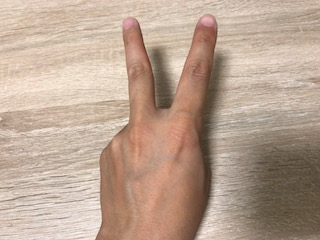

In [8]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

In [9]:
# GoogleColabにディレクトリの構造を可視化するためのtreeというソフトをインストール
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (101 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 155455 files and directories currently install

In [10]:
#treeで現状のディレクトリ構成を確認
!tree -d datasets

datasets
├── choki
├── gu
└── pa

3 directories


In [11]:
#変数の定義
dataset_original_dir = 'datasets'
dataset_root_dir = 'target_datasets'

In [12]:
#分割ソフトのダウンロード（からあげ氏自作とのこと）
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2022-04-19 23:46:42--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py’

split_train_val.py  100%[===================>]   2.62K  --.-KB/s    in 0s      

2022-04-19 23:46:42 (33.6 MB/s) - ‘split_train_val.py’ saved [2683/2683]



In [13]:
import split_train_val

In [14]:
split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size=0.67
)

datasets/choki copy is done
datasets/gu copy is done
datasets/pa copy is done
processing is done


In [15]:
!ls target_datasets/train/choki/

choki_01.jpg  IMG_0783.JPG  IMG_0795.JPG  IMG_0807.JPG	IMG_0871.JPG
IMG_0770.JPG  IMG_0785.JPG  IMG_0797.JPG  IMG_0808.JPG	IMG_0873.JPG
IMG_0771.JPG  IMG_0786.JPG  IMG_0799.JPG  IMG_0809.JPG	IMG_0874.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0800.JPG  IMG_0811.JPG	IMG_0878.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0801.JPG  IMG_0813.JPG	IMG_0880.JPG
IMG_0776.JPG  IMG_0789.JPG  IMG_0802.JPG  IMG_0815.JPG	IMG_0882.JPG
IMG_0778.JPG  IMG_0790.JPG  IMG_0803.JPG  IMG_0816.JPG	IMG_0883.JPG
IMG_0780.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0817.JPG	IMG_0885.JPG
IMG_0782.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0870.JPG


In [16]:
!ls target_datasets/val/choki

IMG_0772.JPG  IMG_0784.JPG  IMG_0804.JPG  IMG_0872.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0793.JPG  IMG_0810.JPG  IMG_0875.JPG	IMG_0884.JPG
IMG_0777.JPG  IMG_0794.JPG  IMG_0812.JPG  IMG_0876.JPG
IMG_0779.JPG  IMG_0796.JPG  IMG_0814.JPG  IMG_0877.JPG
IMG_0781.JPG  IMG_0798.JPG  IMG_0818.JPG  IMG_0879.JPG


In [26]:
#訓練データと検証データの場所を変数として定義しておく
train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

## 教師データのラベル作成
学習するファイルのラベルを作成します。
必要なライブラリをインポート

In [2]:
import sys
import os
import shutil

In [3]:
backup_dir = './model'

In [4]:
#ラベルデータを作成（最後に表示されるclass numberが画像の種類の数）

In [18]:
labels = [d for d in os.listdir(dataset_original_dir) \
    if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
  for label in labels:
    f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

class number=3


In [19]:
!cat ./model/labels.txt

choki
gu
pa


##学習の事前準備
ライブラリのインポート

In [20]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [21]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [23]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)

NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


In [24]:
#学習のハイパーパラメータ設定
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 20
# バッチサイズ
BATCH_SIZE = 8

In [27]:
#データセットの前処理
IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

Found 111 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [28]:
#前処理の確認
#イテレータの中身を確認しておきます。イテレータの中身を確認するには next関数を使うのが簡単。
(image_data,label_data) = train_data.next()
print(image_data)
print(label_data)

[[[[0.8980393  0.81568635 0.7490196 ]
   [0.7960785  0.7137255  0.64705884]
   [0.8862746  0.8117648  0.74509805]
   ...
   [0.7411765  0.6745098  0.6117647 ]
   [0.69411767 0.6117647  0.54509807]
   [0.7411765  0.6509804  0.5882353 ]]

  [[0.8352942  0.75294125 0.6862745 ]
   [0.85098046 0.7686275  0.7019608 ]
   [0.8941177  0.8117648  0.74509805]
   ...
   [0.65882355 0.58431375 0.5254902 ]
   [0.6666667  0.58431375 0.5176471 ]
   [0.7686275  0.6784314  0.6156863 ]]

  [[0.90196085 0.8196079  0.74509805]
   [0.8980393  0.81568635 0.7411765 ]
   [0.8941177  0.8117648  0.7372549 ]
   ...
   [0.6784314  0.6039216  0.54509807]
   [0.7058824  0.62352943 0.5568628 ]
   [0.7137255  0.6313726  0.5647059 ]]

  ...

  [[0.8745099  0.8078432  0.7686275 ]
   [0.8117648  0.74509805 0.7058824 ]
   [0.86666673 0.8000001  0.7607844 ]
   ...
   [0.42352945 0.37254903 0.30980393]
   [0.4431373  0.38823533 0.3372549 ]
   [0.43529415 0.37254903 0.3137255 ]]

  [[0.82745105 0.7607844  0.72156864]
   [0.8

In [29]:
print(image_data.shape)
print(label_data.shape)

(8, 64, 64, 3)
(8, 3)


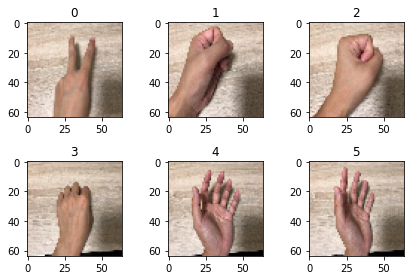

In [30]:
import matplotlib.pyplot as plt
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(image_data[i])